In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32


2176

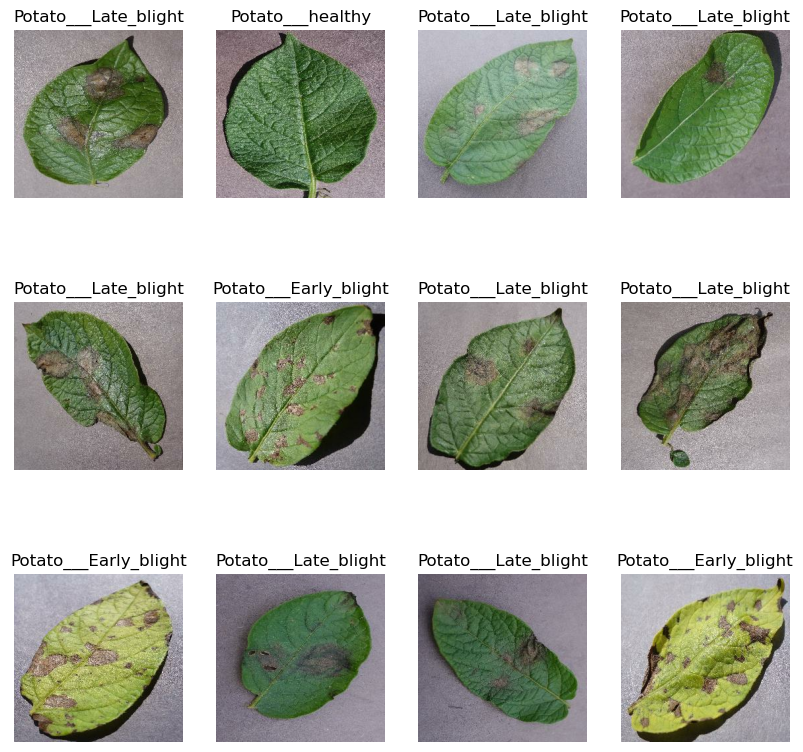

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
#     print(image_batch.shape)
#     print(label_batch.numpy())
#     print(image_batch[0].numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

In [9]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(train_ds)

54

In [13]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size =int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

54

In [35]:
len(val_ds)

6

In [36]:
len(test_ds)

8

In [37]:
len(dataset)

68

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [45]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [49]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [50]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_13 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [51]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 80s 1s/step - loss: 0.9039 - accuracy: 0.5266 - val_loss: 0.8468 - val_accuracy: 0.4635
Epoch 2/50
54/54 [==============================] - 81s 2s/step - loss: 0.7217 - accuracy: 0.6626 - val_loss: 0.6049 - val_accuracy: 0.7083
Epoch 3/50
54/54 [==============================] - 81s 2s/step - loss: 0.3915 - accuracy: 0.8374 - val_loss: 0.2844 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 84s 2s/step - loss: 0.2994 - accuracy: 0.8814 - val_loss: 0.2821 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 79s 1s/step - loss: 0.2617 - accuracy: 0.8924 - val_loss: 0.2495 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 88s 2s/step - loss: 0.2435 - accuracy: 0.9057 - val_loss: 0.3521 - val_accuracy: 0.8490
Epoch 7/50
54/54 [==============================] - 84s 2s/step - loss: 0.2061 - accuracy: 0.9172 - val_loss: 0.1569 - val_accuracy: 0.9323
Epoch 8/50
54/54 [==

In [54]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 377ms/step - loss: 0.0426 - accuracy: 0.9805


In [55]:
scores

[0.04257313534617424, 0.98046875]

In [57]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [58]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [59]:
history.history['accuracy']

[0.5266203880310059,
 0.6626157164573669,
 0.8373842835426331,
 0.8813657164573669,
 0.8923611044883728,
 0.9056712985038757,
 0.9172453880310059,
 0.9322916865348816,
 0.9409722089767456,
 0.9456018805503845,
 0.9508101940155029,
 0.9450231194496155,
 0.9565972089767456,
 0.921875,
 0.9589120149612427,
 0.9467592835426331,
 0.9658564925193787,
 0.9675925970077515,
 0.9565972089767456,
 0.9762731194496155,
 0.9762731194496155,
 0.9751157164573669,
 0.9716435074806213,
 0.9739583134651184,
 0.9814814925193787,
 0.9710648059844971,
 0.9878472089767456,
 0.9745370149612427,
 0.9797453880310059,
 0.9814814925193787,
 0.9855324029922485,
 0.9797453880310059,
 0.9797453880310059,
 0.9797453880310059,
 0.9918981194496155,
 0.9762731194496155,
 0.9826388955116272,
 0.9924768805503845,
 0.9849537014961243,
 0.9907407164573669,
 0.9930555820465088,
 0.9884259104728699,
 0.9936342835426331,
 0.9924768805503845,
 0.9872685074806213,
 0.9542824029922485,
 0.9855324029922485,
 0.984375,
 0.989004611

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plt(range(EPOCHS))